Importing Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#importing Dataset
data = pd.read_csv('data.csv')

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
data.shape

(569, 33)

In [50]:
#Assigning Malignant to 1 and Benign to 0
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

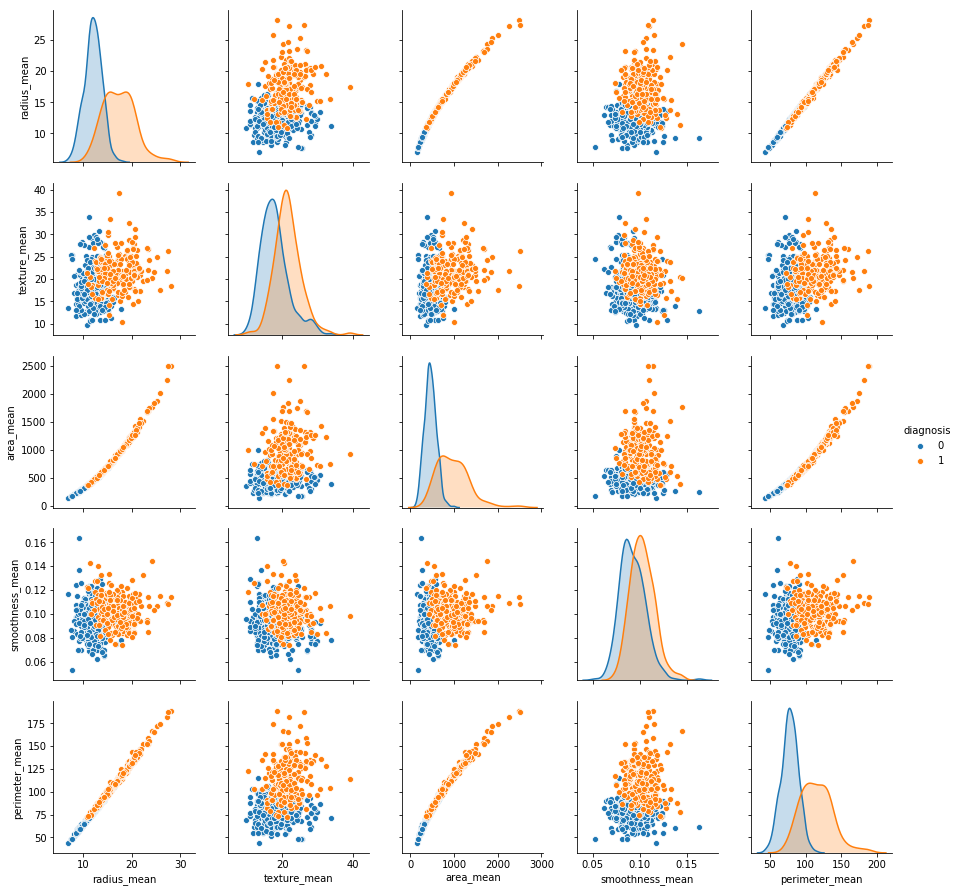

In [51]:
#visualizing dataset relation
sns.pairplot(data, vars=['radius_mean','texture_mean','area_mean','smoothness_mean','perimeter_mean'],hue ='diagnosis')

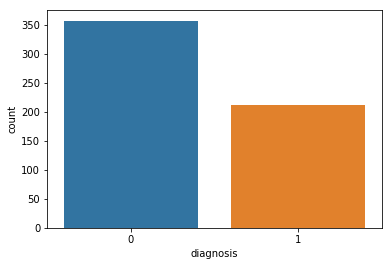

In [52]:
#Plotting count of target or diagnosis variable
sns.countplot(data['diagnosis'])

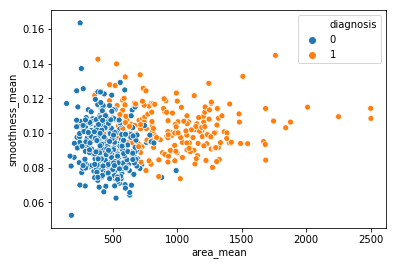

In [53]:
#plotting area_mean vs smoothness_mean scatterplot
sns.scatterplot(x='area_mean',y='smoothness_mean', hue='diagnosis', data=data)

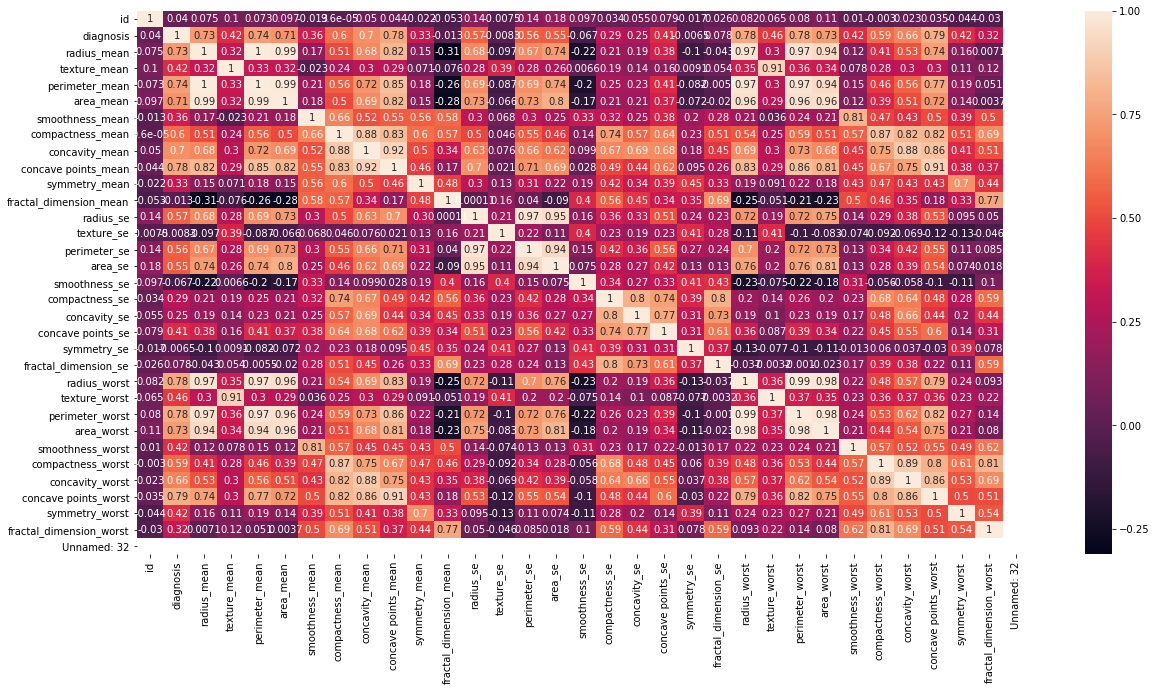

In [54]:
#Plotting heatmap to see the correlation 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot= True)

In [55]:
#Dropping target and useless variable
x=data.drop(['diagnosis','Unnamed: 32'],axis=1)

In [56]:
#Seperating target variable
y=data['diagnosis']

In [58]:
#Scalling to get good accuracy
from sklearn.preprocessing import MinMaxScaler
scaller=MinMaxScaler(feature_range =(0,1))
x=scaller.fit_transform(x)

C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
classifier= SVC()

In [63]:
classifier.fit(x_train,y_train)

C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
y_pred= classifier.predict(x_test)

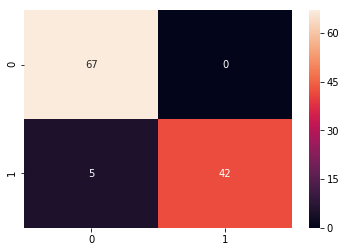

In [65]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Improving Performance

In [68]:
#Dropping target and useless variable
x=data.drop(['diagnosis','Unnamed: 32'],axis=1)
y=data['diagnosis']

In [69]:
#Scalling to get good accuracy (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
x=scaller.fit_transform(x)

C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
classifier= SVC()
classifier.fit(x_train,y_train)

C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred= classifier.predict(x_test)

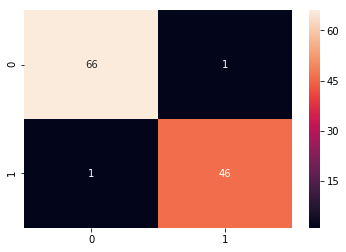

In [74]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



98% accuracy of this model